<a href="https://colab.research.google.com/github/avirichie/My-Deep-Learning-models/blob/master/My_Keras_02(IMDB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

In [0]:
#num_words=10000 means we only take 10000 most frequent words from the dataset 
(train_X,train_Y),(test_X,test_Y)=imdb.load_data(num_words=10000) 

In [41]:
print("The training set shape is",train_X.shape)
print("The training labels are",train_Y.shape)
print("The test set shape is ",test_X.shape)
print("The test labels are ",test_Y.shape)

The training set shape is (25000,)
The training labels are (25000,)
The test set shape is  (25000,)
The test labels are  (25000,)


In [4]:
train_X[10]  # train and tes data is a list of reviews and each review is a list of word indices 
train_Y[10]  # Train and test labels are lists of 0s and 1s where 0 stands for negetive and 1 stands for positive 

1

In [5]:
#In order to check the max value index
max([max(sequence) for sequence in train_X])

9999

Preprocessing the data
#We cant feed the list as input to the neural networks.
#We have to turn lists into lists of tensors. One way for it to do is one hot encoding of the input data that means it will be 10000 dimensional vector filled with 1 and 0's except on the places where the indices is present

In [0]:
import numpy as np 

def one_hot_encode(sequences,dimensions=10000):
    results=np.zeros((len(sequences),dimensions))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
train_X_enc= one_hot_encode(train_X)
test_X_enc = one_hot_encode(test_X)


In [8]:
train_X_enc[10]
test_X_enc[10]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
train_Y_enc =np.asarray(train_Y).astype('float32')
test_Y_enc= np.asarray(test_Y).astype('float32')

In [0]:
#Building the model 

from tensorflow.keras import models
from tensorflow.keras import layers  

model= models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We Create a Validation set to monitor the accuracy of the model on the data

In [0]:
val_X = train_X_enc[:10000]
partial_train_X = train_X_enc[10000:]
val_Y = train_Y_enc[:10000]
partial_train_Y = train_Y_enc[10000:]

In [50]:
mod=model.fit(partial_train_X,partial_train_Y,batch_size=512,epochs=4,validation_data=(val_X,val_Y))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 125us/sample - loss: 0.0512 - acc: 0.9866 - val_loss: 0.4245 - val_acc: 0.8749
Epoch 2/4
15000/15000 [==============================] - 2s 125us/sample - loss: 0.0412 - acc: 0.9904 - val_loss: 0.4353 - val_acc: 0.8728
Epoch 3/4
15000/15000 [==============================] - 2s 126us/sample - loss: 0.0362 - acc: 0.9911 - val_loss: 0.4687 - val_acc: 0.8710
Epoch 4/4
15000/15000 [==============================] - 2s 126us/sample - loss: 0.0246 - acc: 0.9957 - val_loss: 0.5025 - val_acc: 0.8726


In [46]:
print(mod.history)
print(mod.history.keys())

{'loss': [0.49963696292241416, 0.29251959923108417, 0.2186438243230184, 0.1745053758184115], 'acc': [0.78706664, 0.90426666, 0.92593336, 0.9410667], 'val_loss': [0.3774428716659546, 0.31255332493782045, 0.2765948617219925, 0.277582766866684], 'val_acc': [0.8681, 0.8772, 0.8925, 0.8901]}
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [0]:
history_dict=mod.history

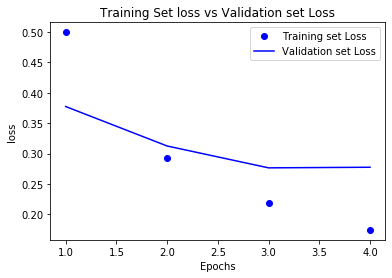

In [48]:
import matplotlib.pyplot as plt

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label="Training set Loss")
plt.plot(epochs,val_loss_values,'b',label="Validation set Loss")
plt.title("Training Set loss vs Validation set Loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [63]:
model.predict(test_X_enc)

array([[0.47448424, 0.5085617 , 0.49989942, ..., 0.44625306, 0.47660142,
        0.47159386],
       [0.45512173, 0.51845324, 0.4759837 , ..., 0.4479011 , 0.4392316 ,
        0.4632325 ],
       [0.47592238, 0.5790727 , 0.48393494, ..., 0.3479593 , 0.4331301 ,
        0.45395762],
       ...,
       [0.4870963 , 0.488979  , 0.49655232, ..., 0.4434712 , 0.47602004,
        0.48920768],
       [0.4773391 , 0.50280696, 0.4981943 , ..., 0.43711987, 0.46471924,
        0.47436902],
       [0.49120688, 0.5052999 , 0.495415  , ..., 0.45709667, 0.4687239 ,
        0.4886402 ]], dtype=float32)